<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Choosing_The_Polynomial_Degree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Choosing the correct polynomial degree

Choosing the correct polynomial degree is crucial for a polynomial regression model. Here's a summary of the process:

1. **Objective**:
To find the optimal polynomial degree for the regression model that provides a good fit to the data without overfitting.

2. **Process**:

- **Initialization**: Start with a linear model (degree 1).

- **Looping Over Degrees**:
  1. For each degree from 1 to a predefined maximum (e.g., 10 or any suitable number):
     - Use polynomial features to transform the data to the desired degree.
     - Train a polynomial regression model using the transformed features.
     - Predict the outputs for both the training data and, if available, a validation set.
     - Evaluate the predictions using a suitable metric (e.g., Mean Squared Error).
  2. Store the evaluation metric for each degree.

- **Visualization**: Plot the evaluation metric against the polynomial degrees.
  - Look for the degree where the error is minimized.
  - Be cautious of overfitting: The training error might continue to decrease, but if the validation error starts to increase, it's a sign of overfitting.

- **Choosing the Degree**:
  1. **Training Error**: It will typically decrease as the polynomial degree increases because the model can fit to the noise in the training data.
  2. **Validation Error**: It will typically decrease initially and then increase as the degree gets too high (due to overfitting). The inflection point or the minimum validation error point is typically the best degree.

3. **Considerations**:
- **Computational Complexity**: As the polynomial degree increases, the number of features and the computation required increases.
- **Regularization**: If the model seems to be overfitting, consider adding regularization (like Ridge or Lasso) instead of merely reducing the polynomial degree.
- **Real-world Knowledge**: Sometimes, domain knowledge can guide the selection of degree.
  
4. **Conclusion**:
Looping over various polynomial degrees and evaluating on a validation set is an empirical way to find an optimal degree. It provides a balance between fitting the data well and keeping the model simple enough to generalize to new data.

In [6]:
##IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [48]:
##Create DataFrames of dependent and independet variables
df = pd.read_csv('Advertising.csv')
X = df.drop('sales', axis=1)
y = df["sales"]

In [57]:
#create the lists we will save our results in
train_rmse = []
test_rmse = []

In [54]:
def create_model(degree, X, y):
  polynomial_features_convertor = PolynomialFeatures(degree=degree, include_bias=False)
  polynomial_features = polynomial_features_convertor.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=101)

  model = LinearRegression()

  model.fit(X_train, y_train)

  return {"model":model, "data":[X_train, X_test, y_train, y_test]}




def solve(degree, X, y):

  init_model = create_model(degree, X, y)

  model = init_model["model"]
  y_train_pred = model.predict(init_model["data"][0])
  y_test_pred = model.predict(init_model["data"][1])

  train_rmse.append(np.sqrt(mean_squared_error(init_model["data"][2],y_train_pred)))
  test_rmse.append(np.sqrt(mean_squared_error(init_model["data"][3],y_test_pred)))


In [58]:
#main loop
for i in range(1, 10):
  solve(i, X, y)

In [59]:
train_rmse

[1.734594124329376,
 0.5879574085292232,
 0.43393443569020673,
 0.35170836883993495,
 0.2509342964085938,
 0.1992470718506088,
 5.421578379552841,
 0.1422460013426133,
 0.1681687270874676]

plotting the evaluations agains polynomial degree

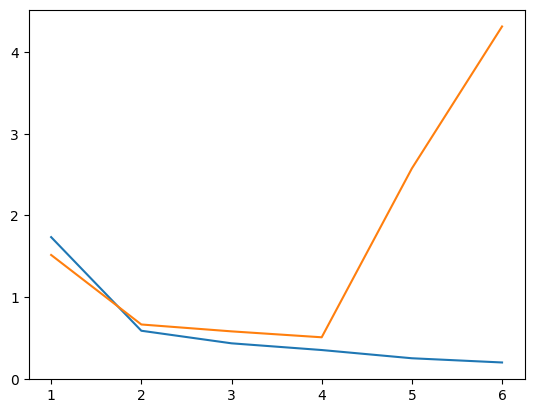

In [60]:
plt.plot(range(1, 7), train_rmse[:6])
plt.plot(range(1, 7), test_rmse[:6])

##Model Persistence

In [53]:
from joblib import dump, load

In [ ]:
degree = 4 ##choose based on the evaluations

polynomial_features_convertor = PolynomialFeatures(degree=degree, include_bias=False)
polynomial_features = polynomial_features_convertor.fit_transform(X)

model = LinearRegression()
model.fit(polynomial_features, y) ##we don't split to a train/test set!

#predict on two test cases
model.predict(polynomial_features_convertor.fit_transform([[12,23,21], [22,23,11]]))


##Save Model and Features Convertor to File

In [ ]:
dump(model, "finel_polynomial_model.joblib")

In [ ]:
dump(polynomial_features_convertor, "polynomial_features_convertor.joblib")

##Reload Model and Features Convertor

In [69]:
reloaded_model = load("finel_polynomial_model.joblib")
reloaded_features_convertor = load("polynomial_features_convertor.joblib")

In [70]:
reloaded_model.predict(reloaded_features_convertor.fit_transform([[12,23,21], [22,23,11]]))

array([6.10354129, 7.37616274])